In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("jre.csv")
df = df.drop(columns=["Unnamed: 0"])
df = df[~df["pod_num"].str.contains("MMA")]

In [4]:
df.head(5)

,pod_num,guest,guest_desc,transcript,date
0,1104,Boyan Slat,"Boyan Slat is an inventor, entrepreneur and fo...","Ladies and gentlemen, welcome to the show. Ho...","April 16, 2018"
1,1105,Michael Hunter,Michael Hunter is the chef and owner of Antler...,"Hey everybody, how the fuck are ya? Huh? Huh?...","April 17, 2018"
2,1106,Colion Noir,"Colion Noir is a gun rights activist, lawyer, ...",hey ladies gentlemen how's the thing this epi...,"April 18, 2018"
3,1107,Sam Harris & Maajid Nawaz,Sam Harris is a neuroscientist and author of t...,hey you friends what's going on this episode ...,"April 18, 2018"
4,1108,Peter Attia,Peter Attia is is the founder of Attia Medical...,late and gentlemen how's everyone doing I'm d...,"April 24, 2018"


In [5]:
len(df)

277

In [11]:
for index, row in df[df["transcript"].str.contains("Bulgaria", case=False)].iterrows():
    print(row["guest"])
    print(row["transcript"])

Andrew Santino
 hello ladies and gentlemen August 10th September 14th Columbus Ohio those are the two places where there's actually still tickets for sale everything else JoeRogan.Com juicy shit hitting the road baby but it's over September 29th is the last of my tour dates and that is in Toronto and I think it's almost sold out Joe Rogan. Com oh this episode of podcast is brought to you by expressvpn listen folks privacy you need online privacy all this shit you hear about online security breaches it's hard not to worry about where your data goes making an online purchase or even just accessing your email could put your private information at risk you're being tracked online by social media sites marketing companies and your mobile or internet provider that's why I decided to take back my privacy by using Express VPN Express VPN has easy-to-use apps that run seamlessly in the background of my computer or do you use on your phone or tablet turning on expressvpn threat protection it onl

## Guests

In [66]:
guests = df.groupby("guest").size()
reocurring_guests = guests.where(guests > 1).dropna()
reocurring_guests.sort_values(ascending=False)

guest
Tom Papa              5.0
Tim Dillon            4.0
Mike Baker            4.0
Tony Hinchcliffe      3.0
Lex Fridman           3.0
Theo Von              3.0
Duncan Trussell       3.0
Joey Diaz             3.0
Tom Green             2.0
Tim Pool              2.0
Tim Kennedy           2.0
Steven Rinella        2.0
Peter Schiff          2.0
Nikki Glaser          2.0
Mike Tyson            2.0
Andrew Santino        2.0
Andrew Schulz         2.0
Jordan Peterson       2.0
Gad Saad              2.0
Dr. Rhonda Patrick    2.0
Dr. Debra Soh         2.0
Donnell Rawlings      2.0
Colion Noir           2.0
Cameron Hanes         2.0
Brian Redban          2.0
Bill Burr             2.0
Ben Greenfield        2.0
Kyle Dunnigan         2.0
dtype: float64

## Greetings

In [83]:
def get_type(s):
    types = ["comedian", "author", "athlete", "Professor", "entrepreneur", "journalist", "founder", "singer"]
    for t in types:
        if t.lower() in s.lower():
            return t.lower()
    return "other"
df["guest_type"] = df["guest_desc"].apply(get_type)

<AxesSubplot:xlabel='guest_type'>

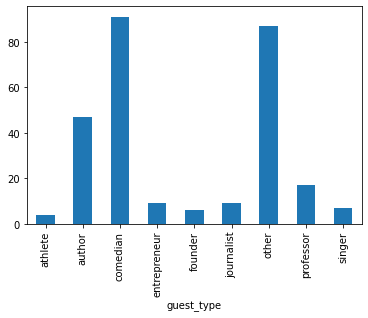

In [84]:
df.groupby("guest_type").size().plot.bar()

In [85]:
df[df["guest_type"] == "other"]

,pod_num,guest,guest_desc,transcript,date,guest_type
1,1105,Michael Hunter,Michael Hunter is the chef and owner of Antler...,"Hey everybody, how the fuck are ya? Huh? Huh?...","April 17, 2018",other
2,1106,Colion Noir,"Colion Noir is a gun rights activist, lawyer, ...",hey ladies gentlemen how's the thing this epi...,"April 18, 2018",other
11,1115,Mike Baker,Mike Baker is a former CIA covert operations o...,hey what's up everybody I just announced show...,"May 9, 2018",other
13,1117,Tim Kennedy,"Tim Kennedy is a Ranger, sniper, Special Force...",ladies and gentlemen how the fuck is everybod...,"May 17, 2018",other
18,1122,Donnie Vincent,"Donnie Vincent is a biologist, explorer, conse...",hey ladies and gentlemen how's everybody doin...,"May 29, 2018",other
...,...,...,...,...,...,...
256,1552,Matthew McConaughey,\nMatthew McConaughey is an Academy Award-winn...,"Hello, friends, welcome to the show. This epi...","October 22, 2020",other
258,1554,Kanye West,"\nKanye West is a rapper, record producer, fas...","Hello, friends, welcome to the show, this epi...","October 24, 2020",other
262,1558,Tristan Harris,\nFormer Google Design Ethicist Tristan Harris...,"Hello, friends, welcome to the show, this epi...","October 30, 2020",other
275,1571,Emily Harrington,\nRock climber and adventurer Emily Harrington...,"Hello, friends, welcome to the show, this epi...","November 27, 2020",other


In [6]:
def get_greeting(greeting):
    if "gentlemen" in greeting or "ladies" in greeting:
        return "ladies and gentlemen"
    elif "friends" in greeting:
        return "friends"
    elif "everybody" in greeting:
        return "everybody"
    elif "folks" in greeting:
        return "folks"
    else:
        return "other"

In [7]:
df["greeting"] = df["transcript"].str[:50]
df["greeting_name"] = df["greeting"].apply(get_greeting)

<AxesSubplot:xlabel='greeting_name'>

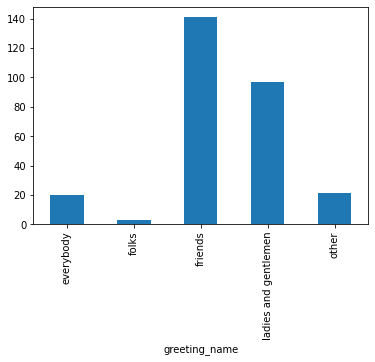

In [8]:
df.groupby("greeting_name").size().plot.bar()

In [9]:
df[df["greeting"].str.contains("motherfuking")]["greeting"]

7       this episode of the motherfuking podcast my c...
89      this episode of the motherfuking pop. Brought...
91      this episode of the motherfuking podcast is b...
102     it's the day before motherfuking Thanksgiving...
Name: greeting, dtype: object

In [10]:
for greeting in df[df["greeting_name"] == "other"]["greeting"]:
    print(greeting)

 this episode is brought to you by Onnit most of t
 this episode of the motherfuking podcast my compa
 Yo Boise Idaho we're coming to town baby! June 30
 I'm taking this show on the Madison area I can't 
 beautiful people of the world hi how you doing go
 he you fuckers Toronto oh shit Toronto coming in 
 hey Boise Idaho and other people but I'm going to
 hey buddy I got a bunch of tour dates coming up a
 I'm going to Tucson on Friday in Boise on Saturda
 I'm back I had to go I had to take some time off 
 raise in Toronto September 29th I've said this a 
 this episode of the podcast is brought to you by 
 this episode of the podcast is brought to you by 
 Netflix You Beautiful bastards Joey Diaz specials
 this episode of the motherfuking pop. Brought to 
 this episode of the motherfuking podcast is broug
 it's the day before motherfuking Thanksgiving and
 this episode of the podcast is brought to you by 
 Bishop so the podcast is brought to you by Square
   they  fit like designer jean

### TODO
- always compare results across different data sets, with/without ads, spell check, etc
- create df run spell check to correct speech to text errors
- create df without ads in transcripts
- cluster: by guest_desc
- sentiment analysis
- train model on rogan transcript only, predict next response, sentence
- number of offensive sentences, average prob per sentence?

## Profanity

In [86]:
from profanity_check import predict, predict_prob

In [87]:
df["profanity_pred"] = df["transcript"].apply(lambda s: [s]).apply(predict).apply(bool)
df["profanity_prob"] = df["transcript"].apply(lambda s: [s]).apply(predict_prob)

In [90]:
df[["guest","profanity_prob", "profanity_pred", "guest_desc", "guest_type"]].sort_values("profanity_prob")

,guest,profanity_prob,profanity_pred,guest_desc,guest_type
20,Robert Schoch,[0.00019790937154024992],False,Robert Schoch is an associate professor of Nat...,professor
247,Brian Muraresku & Graham Hancock,[0.00153465072474582],False,\nAttorney and scholar Brian C. Muraresku is t...,author
71,Chris Kresser & Dr. Joel Kahn,[0.0017442293476518731],False,"Chris Kresser, M.S., L.Ac is a globally recogn...",other
112,Sir Roger Penrose,[0.0023878808165375917],False,Sir Roger Penrose OM FRS is an English mathema...,professor
129,Brian Cox,[0.0026294748018217224],False,Professor Brian Cox is an English physicist an...,professor
...,...,...,...,...,...
116,Joey Diaz,[0.9999983703826889],True,Joey “CoCo” Diaz is a Cuban-American stand up ...,comedian
44,Andrew Santino,[0.9999990169487569],True,Andrew Santino is a stand up comedian and acto...,comedian
79,Andrew Santino,[0.9999993168867961],True,Andrew Santino is a stand up comedian and acto...,comedian
36,Joey Diaz,[0.9999999105362303],True,Joey “CoCo” Diaz is a Cuban-American stand up ...,comedian


In [109]:
df[["guest","profanity_prob", "profanity_pred", "guest_desc", "guest_type"]].sort_values("profanity_prob").tail(30)

,guest,profanity_prob,profanity_pred,guest_desc,guest_type
102,Mike Ward & Pantelis,[0.9997053457708975],True,"Mike Ward is a host and comedian, who performs...",comedian
9,Brian Redban,[0.9997313327638878],True,Brian Redban is a comedian and the founder of ...,comedian
128,Nick Di Paolo,[0.9997360789395238],True,Nick DiPaolo is a writer and stand up comedian...,comedian
165,Chris D'Elia,[0.9997810790849544],True,"\nChris D’Elia is an actor, writer, and comedi...",comedian
105,Anthony Cumia,[0.9997971367439151],True,Anthony Cumia is aradio personality and host f...,other
125,Richard Rawlings,[0.9998053575776801],True,Richard Rawlings is the owner of Gas Monkey Ga...,other
220,Post Malone,[0.999830064684272],True,"\nPost Malone is a singer-songwriter, rapper a...",singer
31,Ari Shaffir,[0.999841455321128],True,Ari Shaffir is a stand-up comedian and also ho...,comedian
202,Joe Schilling,[0.9998508936672816],True,\nJoe Schilling is an American Muay Thai kickb...,other
119,Greg Fitzsimmons,[0.9998632477595193],True,Greg Fitzsimmons is a writer and stand-up come...,comedian


In [107]:
df[["guest","profanity_prob", "profanity_pred", "guest_desc", "guest_type"]].sort_values("profanity_prob").head(20)

,guest,profanity_prob,profanity_pred,guest_desc,guest_type
20,Robert Schoch,[0.00019790937154024992],False,Robert Schoch is an associate professor of Nat...,professor
247,Brian Muraresku & Graham Hancock,[0.00153465072474582],False,\nAttorney and scholar Brian C. Muraresku is t...,author
71,Chris Kresser & Dr. Joel Kahn,[0.0017442293476518731],False,"Chris Kresser, M.S., L.Ac is a globally recogn...",other
112,Sir Roger Penrose,[0.0023878808165375917],False,Sir Roger Penrose OM FRS is an English mathema...,professor
129,Brian Cox,[0.0026294748018217224],False,Professor Brian Cox is an English physicist an...,professor
205,Barbara Freese,[0.0037492525049496496],False,"\nBarbara Freese is an author, environmental a...",author
107,Dr. Ben Goertzel,[0.0037696780919332673],False,Dr. Ben Goertzel is the founder and CEO of Sin...,founder
50,Doug Duren & Bryan Richards,[0.005189722354340386],False,"Doug Duren is a passionate hunter, farmer, lan...",other
157,Peter Hotez,[0.005842648089442335],False,"Peter Hotez, M.D., Ph.D. is Dean of the Nation...",professor
268,Adam Alter,[0.0058800010323369015],False,\nAdam Alter is an Associate Professor of Mark...,author


<AxesSubplot:xlabel='guest_type'>

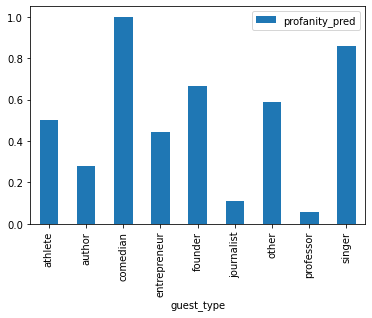

In [113]:
df.groupby("guest_type").mean().plot.bar()

<AxesSubplot:xlabel='guest_type'>

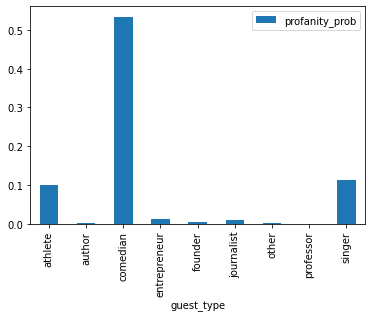

In [120]:
df.groupby("guest_type").min().plot.bar()

athlete              AxesSubplot(0.1,0.679412;0.235294x0.220588)
author          AxesSubplot(0.382353,0.679412;0.235294x0.220588)
comedian        AxesSubplot(0.664706,0.679412;0.235294x0.220588)
entrepreneur         AxesSubplot(0.1,0.414706;0.235294x0.220588)
founder         AxesSubplot(0.382353,0.414706;0.235294x0.220588)
journalist      AxesSubplot(0.664706,0.414706;0.235294x0.220588)
other                    AxesSubplot(0.1,0.15;0.235294x0.220588)
professor           AxesSubplot(0.382353,0.15;0.235294x0.220588)
singer              AxesSubplot(0.664706,0.15;0.235294x0.220588)
dtype: object

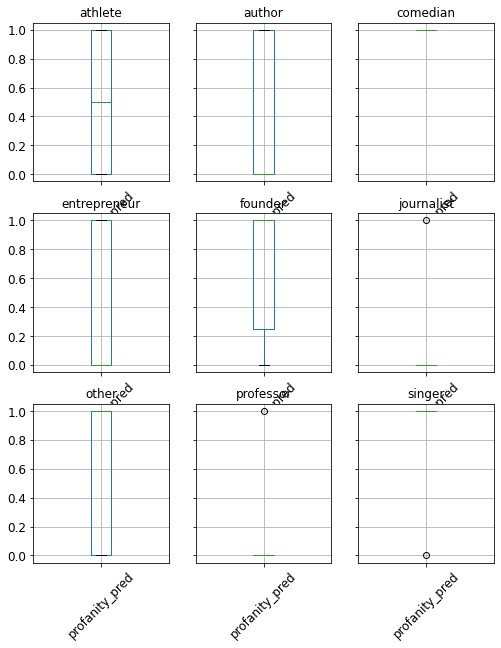

In [117]:
df.groupby("guest_type").boxplot(rot=45, fontsize=12, figsize=(8,10))

<AxesSubplot:xlabel='profanity_pred'>

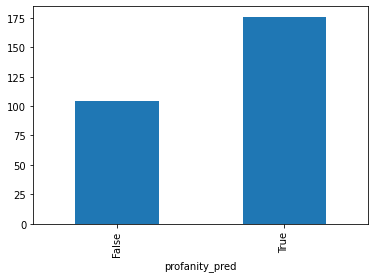

In [33]:
df.groupby("profanity_pred").size().plot.bar()

In [ ]:
df[df["transcript"].str]

In [105]:
def num_offensive_sentences(transcript):
    sentences = transcript.split(".")
    return len([s for s in sentences if predict([s]) == 1])

In [ ]:
df["num_offensive"] = df["transcript"].apply(num_offensive_sentences)

In [ ]:
df[["guest","profanity_prob", "profanity_pred", "guest_desc", "guest_type", "num_offensive"]].sort_values("profanity_prob")

### Resources
#### Profanity
- https://towardsdatascience.com/building-a-better-profanity-detection-library-with-scikit-learn-3638b2f2c4c2
- https://github.com/vzhou842/profanity-check